In [1]:
#in this research, we have collected a top list of 100 crypto assets based on market cap from the cryptocompare API.
#we have also used this top list to get daily historical data of all the crypto assets. This data is in the "/Data folder".

#the first purpose of our research will be to find out the optimal point to buy alt coins based on the position of BTC,
#this research is purely technical in nature.

In [2]:
#we first import pandas, pandas is used for data exploration and manipulation
import pandas as pd

In [3]:
#read top list data
top_list_data = pd.read_csv('Data/top_coins.csv')

In [4]:
print("First 10 rows:")
print(top_list_data.head(10))

First 10 rows:
   Name     MaxSupply
0   BTC  2.100000e+07
1   ETH -1.000000e+00
2   XRP  1.000000e+11
3  USDT -1.000000e+00
4   SOL -1.000000e+00
5   BNB  1.000000e+08
6  DOGE -1.000000e+00
7   ADA  4.500000e+10
8   SUI -1.000000e+00
9  USDC -1.000000e+00


In [5]:
#now, load historical data and aggregate daily to weekly. start with BTC first.

In [8]:
historical_data = pd.read_csv('Data/historical_prices.csv')

In [10]:
#this dataframe above contains OHLCV daily historical data of top crypto assets from the prev 2000days
#it is arranged in descending order, and as such, printing the head or describing it will not be necessary

In [14]:
print("Earliest date:", pd.to_datetime(historical_data['Time'].min(), unit='s'))
print("Latest date:", pd.to_datetime(historical_data['Time'].max(), unit='s'))

Earliest date: 2019-06-25 00:00:00
Latest date: 2024-12-15 00:00:00


In [ ]:
#now, lets start with printing the daily chart for BTC and then aggregrate it into weekly

In [16]:
import matplotlib.pyplot as plt

In [22]:
# Load BTC data
btc_historical_data = historical_data[historical_data['Coin'] == 'BTC'].copy()

In [23]:
# Convert Unix timestamp to datetime
btc_historical_data['Date'] = pd.to_datetime(btc_historical_data['Time'], unit='s')

In [24]:
btc_historical_data.head()

,Coin,Time,High,Low,Open,Close,VolumeFrom,VolumeTo,Date
0,BTC,1561420800,11778.22,10992.37,11035.74,11740.34,84123.73,9.539626e+08,2019-06-25
1,BTC,1561507200,13826.76,11679.10,11740.34,12913.28,211449.88,2.685872e+09,2019-06-26
2,BTC,1561593600,13314.05,10335.34,12913.28,11154.09,202428.68,2.345027e+09,2019-06-27
3,BTC,1561680000,12433.00,10772.75,11154.09,12355.06,120700.97,1.408439e+09,2019-06-28
4,BTC,1561766400,12362.90,11352.27,12355.06,11884.10,81875.16,9.685168e+08,2019-06-29


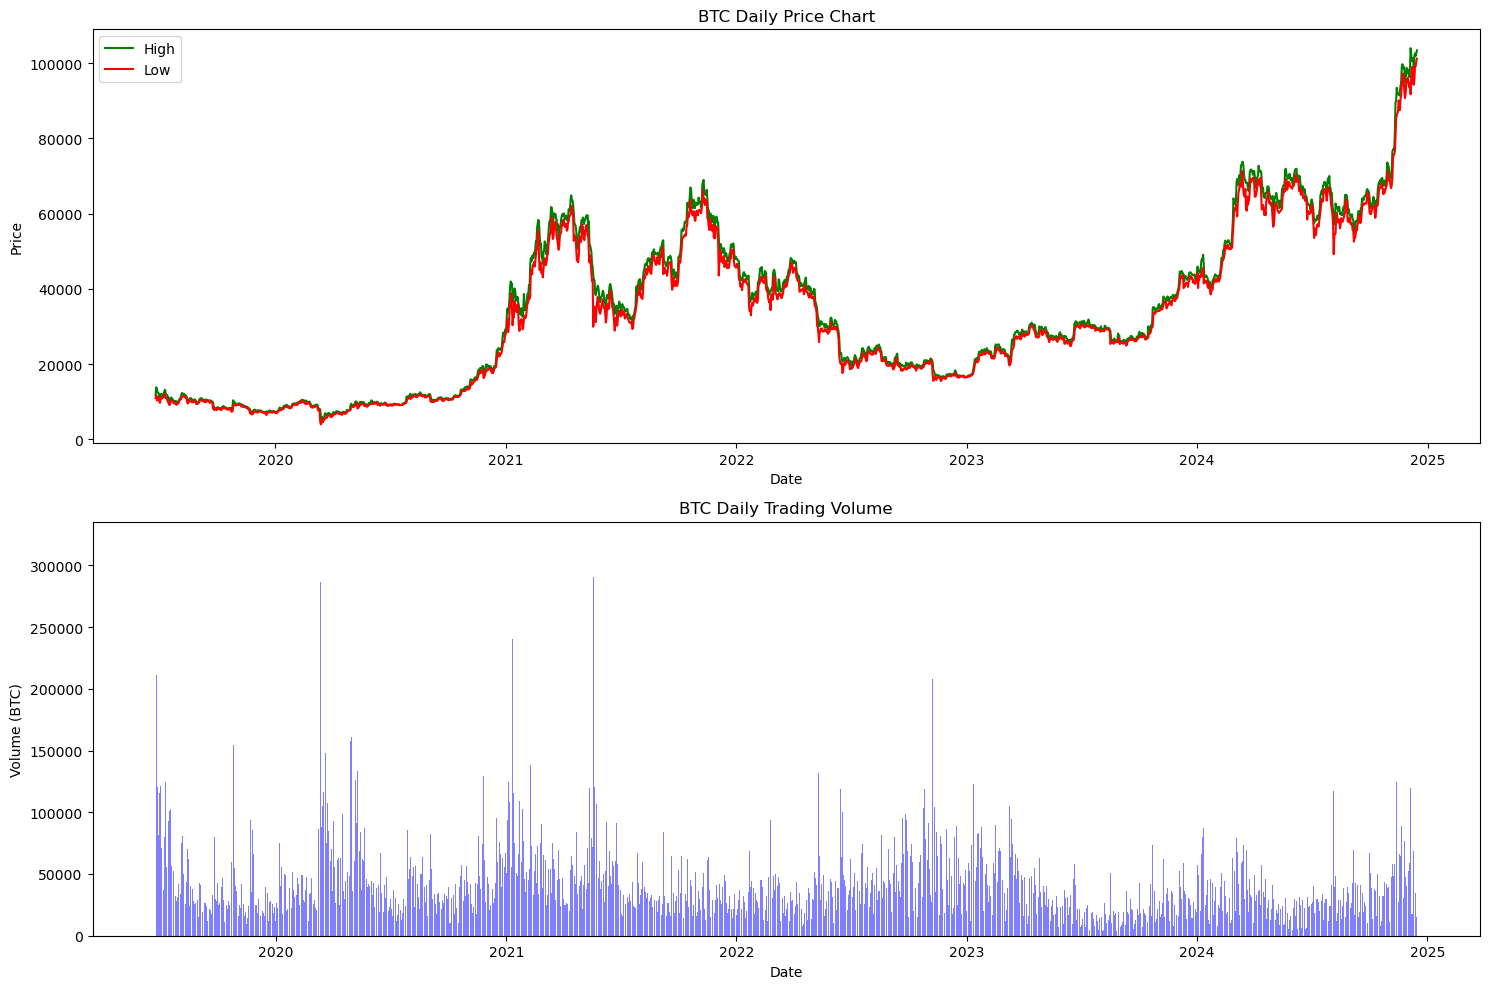

In [28]:
# Create a figure with multiple subplots
plt.figure(figsize=(15,10))
# Price subplot
plt.subplot(2,1,1)
plt.plot(btc_historical_data['Date'], btc_historical_data['High'], label='High', color='green')
plt.plot(btc_historical_data['Date'], btc_historical_data['Low'], label='Low', color='red')
plt.title('BTC Daily Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Volume subplot
plt.subplot(2,1,2)
plt.bar(btc_historical_data['Date'], btc_historical_data['VolumeFrom'], color='blue', alpha=0.5)
plt.title('BTC Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (BTC)')

plt.tight_layout()
plt.show()
